# STOCK PRICE PREDICTION OF RELIANCE COMPANY(6 months data)

In [1]:
#IMPORTING ALL REQUIRED PACKAGES
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.ticker as ticker

In [2]:
rel_6m=pd.read_csv('rel_6m.csv')
rel_6m

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-15,2291.000000,2291.699951,2195.100098,2205.550049,2205.550049,1514858.0
1,2020-10-16,2214.800049,2232.000000,2173.050049,2175.500000,2175.500000,440109.0
2,2020-10-19,2192.000000,2228.399902,2156.000000,2175.800049,2175.800049,352226.0
3,2020-10-20,2183.699951,2193.699951,2152.199951,2155.500000,2155.500000,364138.0
4,2020-10-21,2171.100098,2191.000000,2098.750000,2123.250000,2123.250000,534557.0
...,...,...,...,...,...,...,...
118,2021-04-07,1992.199951,2046.099976,1992.199951,2002.800049,2002.800049,281524.0
119,2021-04-08,2010.050049,2021.150024,1993.500000,2005.000000,2005.000000,1534983.0
120,2021-04-09,2003.000000,2006.800049,1980.099976,1982.650024,1982.650024,241161.0
121,2021-04-12,1956.050049,1966.250000,1900.550049,1911.300049,1911.300049,666100.0


# EXPLORATORY DATA ANALYSIS(EDA)

In [3]:
#CHECKING SHAPE OF DATASET
rel_6m.shape

(123, 7)

In [4]:
#CHECKING NULL VALUES IN DATASET
rel_6m.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [5]:
rel_6m[rel_6m.isna().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
22,2020-11-14,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#SINCE THE DATASET HAD NULL VALUES, WE REMOVE IT USING DROPNA() 
rel_6m1=rel_6m.dropna()
rel_6m1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-15,2291.000000,2291.699951,2195.100098,2205.550049,2205.550049,1514858.0
1,2020-10-16,2214.800049,2232.000000,2173.050049,2175.500000,2175.500000,440109.0
2,2020-10-19,2192.000000,2228.399902,2156.000000,2175.800049,2175.800049,352226.0
3,2020-10-20,2183.699951,2193.699951,2152.199951,2155.500000,2155.500000,364138.0
4,2020-10-21,2171.100098,2191.000000,2098.750000,2123.250000,2123.250000,534557.0
...,...,...,...,...,...,...,...
118,2021-04-07,1992.199951,2046.099976,1992.199951,2002.800049,2002.800049,281524.0
119,2021-04-08,2010.050049,2021.150024,1993.500000,2005.000000,2005.000000,1534983.0
120,2021-04-09,2003.000000,2006.800049,1980.099976,1982.650024,1982.650024,241161.0
121,2021-04-12,1956.050049,1966.250000,1900.550049,1911.300049,1911.300049,666100.0


In [7]:
rel_6m1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
#DESCIPTION OF DATASET
rel_6m1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,122.000000,122.000000,122.000000,122.000000,122.000000,1.220000e+02
mean,2019.220492,2041.577863,1987.499591,2010.641807,2010.641807,6.959096e+05
std,84.269129,83.260235,80.024385,80.557101,80.557101,4.937871e+05
min,1840.000000,1904.699951,1830.000000,1843.150024,1843.150024,1.577130e+05
25%,1962.237488,1973.937470,1931.049988,1954.500031,1954.500031,3.102870e+05
50%,2003.549988,2026.700012,1980.049988,1994.075012,1994.075012,5.181500e+05
75%,2074.025024,2089.924988,2034.874969,2055.450012,2055.450012,9.164472e+05
max,2291.000000,2291.699951,2195.100098,2205.550049,2205.550049,2.401302e+06


In [9]:
#INFORMATION ABOUT DATASET
rel_6m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 122
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       122 non-null    object 
 1   Open       122 non-null    float64
 2   High       122 non-null    float64
 3   Low        122 non-null    float64
 4   Close      122 non-null    float64
 5   Adj Close  122 non-null    float64
 6   Volume     122 non-null    float64
dtypes: float64(6), object(1)
memory usage: 7.6+ KB


In [10]:
#GROUPING OF TWO SPECIFIC COLUMNS, DATE AND CLOSE
rel_6m2 = rel_6m1.groupby('Date')[['Close']].mean()


In [11]:
rel_6m2

,Close
Date,
2020-10-15,2205.550049
2020-10-16,2175.500000
2020-10-19,2175.800049
2020-10-20,2155.500000
2020-10-21,2123.250000
...,...
2021-04-07,2002.800049
2021-04-08,2005.000000
2021-04-09,1982.650024


In [12]:
type(rel_6m1.Date[0])

str

In [13]:
rel_6m['Date'] = pd.to_datetime(rel_6m['Date'], format='%Y-%m-%d')

In [14]:
type(rel_6m.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

# VISUALIZATION OF DATASET

Text(0, 0.5, 'Price')

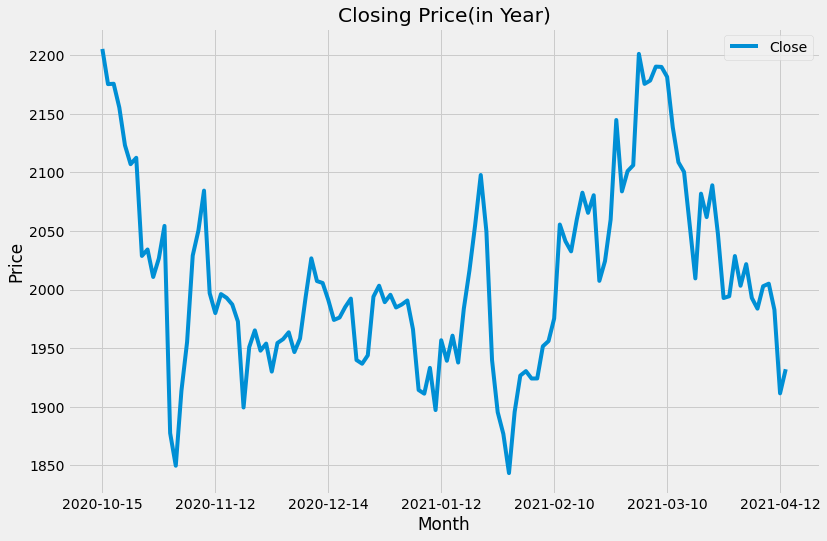

In [15]:
#plotting the graph with date againts closing price(in month)
rel_6m1.plot(figsize=(12,8),x='Date',y='Close',title='Closing Price(in Year)',fontsize=14)
plt.xlabel("Month")
plt.ylabel("Price")

In [16]:
rel_6m2

,Close
Date,
2020-10-15,2205.550049
2020-10-16,2175.500000
2020-10-19,2175.800049
2020-10-20,2155.500000
2020-10-21,2123.250000
...,...
2021-04-07,2002.800049
2021-04-08,2005.000000
2021-04-09,1982.650024


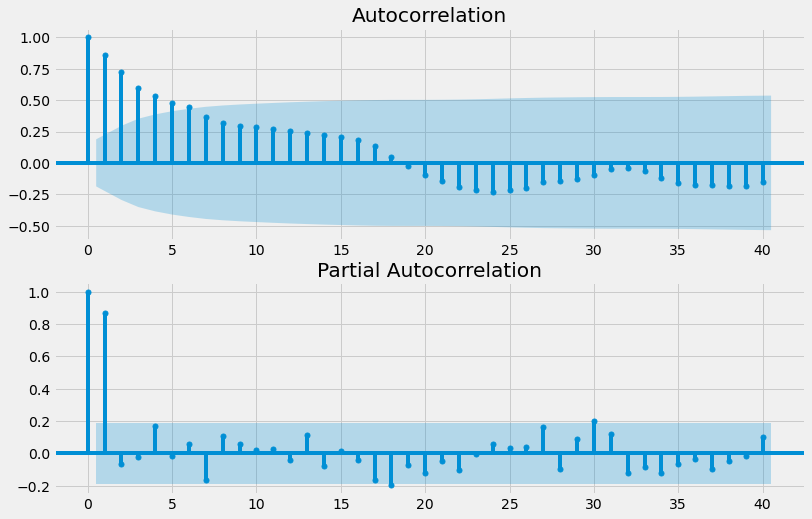

In [17]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(rel_6m2['Close'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(rel_6m2['Close'].iloc[13:],lags=40,ax=ax2)

# DICKEY FULLER TEST(For checking stationarity)

In [18]:
test_result=adfuller(rel_6m2['Close'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. rel_6m has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [19]:
adfuller_test(rel_6m2['Close'])

ADF Test Statistic : -3.2676439642781774
p-value : 0.016388211581150267
#Lags Used : 0
Number of Observations Used : 121
strong evidence against the null hypothesis(Ho), reject the null hypothesis. rel_6m has no unit root and is stationary


In [20]:
rel_6m2['Close First Difference'] = rel_6m2['Close'] - rel_6m2['Close'].shift(1)
rel_6m2['Close'].shift(1)


Date
2020-10-15            NaN
2020-10-16    2205.550049
2020-10-19    2175.500000
2020-10-20    2175.800049
2020-10-21    2155.500000
                 ...     
2021-04-07    1983.650024
2021-04-08    2002.800049
2021-04-09    2005.000000
2021-04-12    1982.650024
2021-04-13    1911.300049
Name: Close, Length: 122, dtype: float64

ADF Test Statistic : -7.313590488696238
p-value : 1.245896245035447e-10
#Lags Used : 2
Number of Observations Used : 118
strong evidence against the null hypothesis(Ho), reject the null hypothesis. rel_6m has no unit root and is stationary


Text(0.5, 1.0, 'Reliance 6 months')

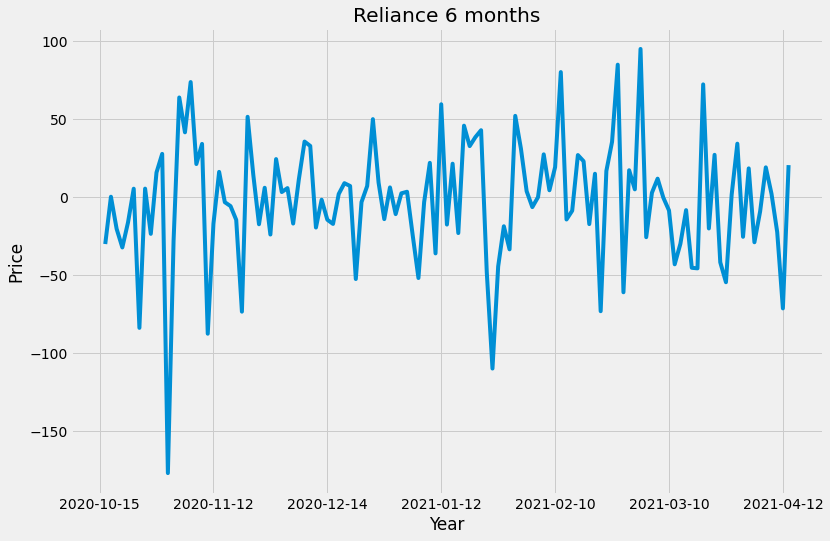

In [21]:
adfuller_test(rel_6m2['Close First Difference'].dropna())
rel_6m2['Close First Difference'].plot(figsize=(12,8))
plt.xlabel("Year")
plt.ylabel("Price")
plt.title('Reliance 6 months')

AUTO ARIMA FUNCTION

In [22]:
stepwise_fit = auto_arima(rel_6m2['Close'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1249.362, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1420.125, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1245.047, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1329.679, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2204.330, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1245.955, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1245.829, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1247.752, Time=0.46 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.956 seconds


ARIMA MODEL(TRAINING AND TESTING OF DATA)

In [27]:
train_rel_6m, test_rel_6m = rel_6m2[0:int(len(rel_6m2)*0.7)], rel_6m2[int(len(rel_6m2)*0.7):]
training_rel_6m = train_rel_6m['Close'].values
test_rel_6m = test_rel_6m['Close'].values
history = [x for x in training_rel_6m]
model_predictions = []
N_test_observations = len(test_rel_6m)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(1,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_rel_6m[time_point]
    history.append(true_test_value)


FORECASTING

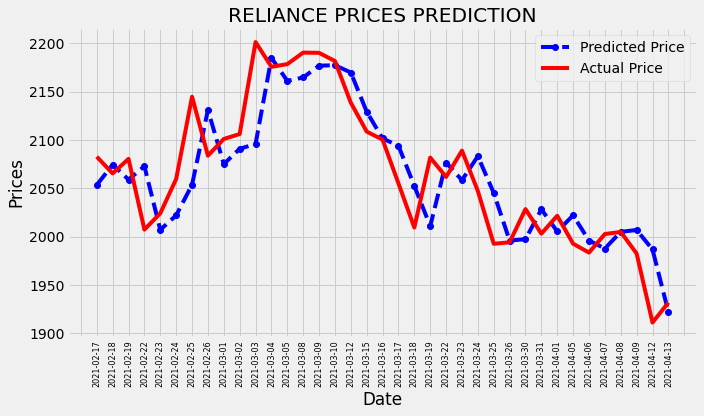

In [28]:
test_set_range = rel_6m2[int(len(rel_6m2)*0.7):].index
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_rel_6m, color='red', label='Actual Price')
plt.title('RELIANCE PRICES PREDICTION')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(rotation=90)
plt.tick_params(axis='x' ,labelsize=8)
# plt.xticks(np.arange(881,1259,50), rel_6m2.Date[881:1259:50])
plt.legend()
plt.tight_layout()
plt.show()

PREDICTION OF FUTURE PRICES

In [29]:
pred=model_fit.predict(start=len(rel_6m2),end=len(rel_6m2)+30,typ='levels')
print(pred)

[1922.36290763 1932.26946365 1941.14057513 1949.0844679  1956.19805594
 1962.56812364 1968.27238459 1973.38042967 1977.95457605 1982.05062743
 1985.71855485 1989.0031063  1991.94435269 1994.57817665 1996.93671032
 1999.04872736 2000.93999397 2002.63358323 2004.15015661 2005.50821601
 2006.72432949 2007.81333341 2008.78851339 2009.66176644 2010.44374609
 2011.14399233 2011.77104804 2012.33256317 2012.8353881  2013.28565719
 2013.68886364 2014.04992649]


In [30]:
# model performance
mse = mean_squared_error(test_rel_6m, model_predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_rel_6m,model_predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_rel_6m, model_predictions))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(model_predictions - test_rel_6m)/np.abs(test_rel_6m))
print('MAPE: '+str(mape))

MSE: 1505.8043675836486
MAE: 30.149049503187943
RMSE: 38.80469517447146
MAPE: 0.03791035928474415
